# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# set up lists to hold response info
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lon = []
temp = []
wind = []

# Url components
url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key
units = "&units=imperial"

In [43]:
# Set up a counter for the print log
record = 0

# loop through cities, make requests and parse
for city in cities:
    try:
        target_url = (url + city + api_key + units)
        response = requests.get(target_url).json()
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        # Add to counter
        record += 1   
        print(f"Retrieved data for {city}.")
        print(target_url)
    # Exceptions for a city that is not found
    except:
        print(f"No data found for {city}.")      
    # Set the time sleep to kick in right before it gets to the call limit (60)
    if record % 59 == 0:
        time.sleep(2)
        
print("------------------")
print("Printing Complete.")

No data found for marcona.
Retrieved data for upernavik.
http://api.openweathermap.org/data/2.5/weather?q=upernavik&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for taolanaro.
Retrieved data for hami.
http://api.openweathermap.org/data/2.5/weather?q=hami&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for jamestown.
http://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kanniyakumari.
http://api.openweathermap.org/data/2.5/weather?q=kanniyakumari&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for coahuayana.
http://api.openweathermap.org/data/2.5/weather?q=coahuayana&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for golden.
http://api.openweathermap.org/data/2.5/weather?q=golden&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for saint george.
http://api.openweathermap.org/data/2.5/weather?q=saint geor

Retrieved data for provideniya.
http://api.openweathermap.org/data/2.5/weather?q=provideniya&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for teguldet.
http://api.openweathermap.org/data/2.5/weather?q=teguldet&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for chail.
http://api.openweathermap.org/data/2.5/weather?q=chail&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for rio grande.
http://api.openweathermap.org/data/2.5/weather?q=rio grande&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for indramayu.
http://api.openweathermap.org/data/2.5/weather?q=indramayu&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for nanakuli.
http://api.openweathermap.org/data/2.5/weather?q=nanakuli&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for atuona.
http://api.openweathermap.org/data/2.5/weather?q=atuona&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved d

Retrieved data for madrid.
http://api.openweathermap.org/data/2.5/weather?q=madrid&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for dwarka.
http://api.openweathermap.org/data/2.5/weather?q=dwarka&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for hambantota.
http://api.openweathermap.org/data/2.5/weather?q=hambantota&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for shimoda.
http://api.openweathermap.org/data/2.5/weather?q=shimoda&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for cabedelo.
http://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mnogovershinnyy.
http://api.openweathermap.org/data/2.5/weather?q=mnogovershinnyy&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for qaanaaq.
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data

Retrieved data for shache.
http://api.openweathermap.org/data/2.5/weather?q=shache&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kruisfontein.
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for sao sebastiao.
http://api.openweathermap.org/data/2.5/weather?q=sao sebastiao&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mbekenyera.
http://api.openweathermap.org/data/2.5/weather?q=mbekenyera&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for emerald.
http://api.openweathermap.org/data/2.5/weather?q=emerald&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for ekhabi.
http://api.openweathermap.org/data/2.5/weather?q=ekhabi&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for chapais.
http://api.openweathermap.org/data/2.5/weather?q=chapais&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Ret

Retrieved data for choya.
http://api.openweathermap.org/data/2.5/weather?q=choya&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for marsh harbour.
http://api.openweathermap.org/data/2.5/weather?q=marsh harbour&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for xining.
http://api.openweathermap.org/data/2.5/weather?q=xining&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for miri.
http://api.openweathermap.org/data/2.5/weather?q=miri&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for tsihombe.
Retrieved data for christchurch.
http://api.openweathermap.org/data/2.5/weather?q=christchurch&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for ishigaki.
http://api.openweathermap.org/data/2.5/weather?q=ishigaki&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for nabire.
http://api.openweathermap.org/data/2.5/weather?q=nabire&appid=73df2cea878643f6b4c2ef4447fe0783&unit

Retrieved data for durusu.
http://api.openweathermap.org/data/2.5/weather?q=durusu&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for arman.
http://api.openweathermap.org/data/2.5/weather?q=arman&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for pasni.
http://api.openweathermap.org/data/2.5/weather?q=pasni&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for nanortalik.
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for yaan.
http://api.openweathermap.org/data/2.5/weather?q=yaan&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for neuquen.
http://api.openweathermap.org/data/2.5/weather?q=neuquen&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for laguna.
http://api.openweathermap.org/data/2.5/weather?q=laguna&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for sajanan.
http://api.

Retrieved data for nago.
http://api.openweathermap.org/data/2.5/weather?q=nago&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for bossangoa.
http://api.openweathermap.org/data/2.5/weather?q=bossangoa&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for saint-philippe.
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for newala.
http://api.openweathermap.org/data/2.5/weather?q=newala&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for along.
http://api.openweathermap.org/data/2.5/weather?q=along&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for zhuhai.
http://api.openweathermap.org/data/2.5/weather?q=zhuhai&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for khani.
http://api.openweathermap.org/data/2.5/weather?q=khani&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for portland

No data found for zouxian.
No data found for higuey.
Retrieved data for constitucion.
http://api.openweathermap.org/data/2.5/weather?q=constitucion&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for soure.
http://api.openweathermap.org/data/2.5/weather?q=soure&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for udachnyy.
http://api.openweathermap.org/data/2.5/weather?q=udachnyy&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for wanaka.
http://api.openweathermap.org/data/2.5/weather?q=wanaka&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for galgani.
Retrieved data for inirida.
http://api.openweathermap.org/data/2.5/weather?q=inirida&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for mount isa.
http://api.openweathermap.org/data/2.5/weather?q=mount isa&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for sitka.
http://api.openweathermap.org/data/2.5/weather?q=s

Retrieved data for ambulu.
http://api.openweathermap.org/data/2.5/weather?q=ambulu&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for coquimbo.
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for cockburn town.
http://api.openweathermap.org/data/2.5/weather?q=cockburn town&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for sterling.
http://api.openweathermap.org/data/2.5/weather?q=sterling&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for porto torres.
http://api.openweathermap.org/data/2.5/weather?q=porto torres&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for kamenka.
http://api.openweathermap.org/data/2.5/weather?q=kamenka&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for port hope.
http://api.openweathermap.org/data/2.5/weather?q=port hope&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial

Retrieved data for kyra.
http://api.openweathermap.org/data/2.5/weather?q=kyra&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for raudeberg.
http://api.openweathermap.org/data/2.5/weather?q=raudeberg&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for verkhnevilyuysk.
http://api.openweathermap.org/data/2.5/weather?q=verkhnevilyuysk&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for luwuk.
http://api.openweathermap.org/data/2.5/weather?q=luwuk&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
No data found for karamay.
Retrieved data for torbay.
http://api.openweathermap.org/data/2.5/weather?q=torbay&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for vardo.
http://api.openweathermap.org/data/2.5/weather?q=vardo&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperial
Retrieved data for padang.
http://api.openweathermap.org/data/2.5/weather?q=padang&appid=73df2cea878643f6b4c2ef4447fe0783&units=imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Create dataframe for printing and saving file
cities_df = pd.DataFrame({"City Name": name, "Cloudiness": clouds, "Country": country, "Date": date, 
                          "Humidity": humidity, "Latitude" : lat, "Longitude": lon, 
                          "Max Temperature": temp, "Wind Speed": wind})
cities_df.head(10)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Upernavik,29,GL,1602171186,89,72.79,-56.15,32.14,9.48
1,Kumul,0,CN,1602171187,42,42.80,93.45,47.64,3.53
2,Jamestown,90,US,1602171187,66,42.10,-79.24,53.01,14.99
3,Kanniyākumāri,25,IN,1602171187,83,8.08,77.57,80.22,14.83
4,Coahuayana Viejo,40,MX,1602171187,73,18.73,-103.68,73.40,11.41
5,Golden,20,US,1602170961,32,39.76,-105.22,64.00,4.70
6,Saint George,1,US,1602170919,17,37.10,-113.58,60.80,4.27
7,Cape Town,75,ZA,1602171187,55,-33.93,18.42,68.00,10.29
8,Marsá Maţrūḩ,0,EG,1602171188,62,31.35,27.25,84.20,6.93
9,Carnarvon,0,AU,1602171188,77,-24.87,113.63,66.20,16.11


In [45]:
# Save DF as csv file
cities_df.to_csv('cities.csv', header=True, index=True)

# Write file to repository
cities_df = "output_data/cities.csv"

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
# Re-define DF because above it's defined as output path
cities_df = pd.DataFrame({"City Name": name, "Cloudiness": clouds, "Country": country, "Date": date, 
                          "Humidity": humidity, "Latitude" : lat, "Longitude": lon, 
                          "Max Temperature": temp, "Wind Speed": wind})

In [47]:
# Get the indices of cities that have humidity over 100% 
cities_df.loc[cities_df["Humidity"]>=101].index

# No values greater than 100 returned.

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

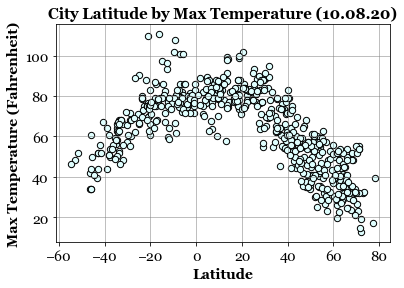

In [48]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Max Temperature", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Max Temperature (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Max Temperature (Fahrenheit)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

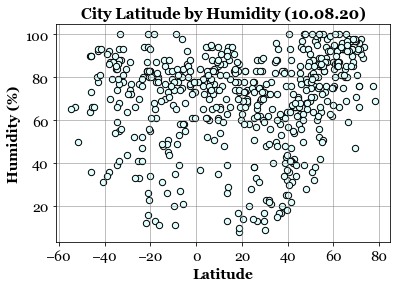

In [49]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Humidity", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Humidity (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

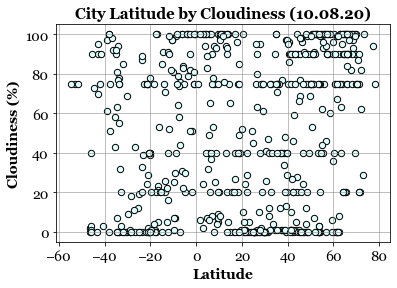

In [50]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Cloudiness", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Cloudiness (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

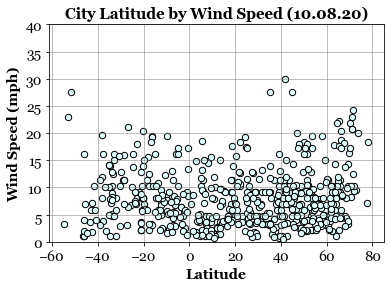

In [53]:
# Generating scatterplot
cities_df.plot.scatter(x="Latitude", y="Wind Speed", color='lightcyan', marker='o', s=40, edgecolor='black')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title, axis labels, and grid
plt.title("City Latitude by Wind Speed (10.08.20)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.ylim(0, 40)

plt.show

## Linear Regression

Run linear regressions on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

In [60]:
northern_df = pd.DataFrame(cities_df.loc[cities_df['Latitude']>=0])
northern_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Upernavik,29,GL,1602171186,89,72.79,-56.15,32.14,9.48
1,Kumul,0,CN,1602171187,42,42.80,93.45,47.64,3.53
2,Jamestown,90,US,1602171187,66,42.10,-79.24,53.01,14.99
3,Kanniyākumāri,25,IN,1602171187,83,8.08,77.57,80.22,14.83
4,Coahuayana Viejo,40,MX,1602171187,73,18.73,-103.68,73.40,11.41


In [61]:
southern_df = pd.DataFrame(cities_df.loc[cities_df['Latitude']<0])
southern_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
7,Cape Town,75,ZA,1602171187,55,-33.93,18.42,68.00,10.29
9,Carnarvon,0,AU,1602171188,77,-24.87,113.63,66.20,16.11
13,Kaitangata,0,NZ,1602171188,64,-46.28,169.85,42.01,4.00
14,Punta Arenas,75,CL,1602171078,66,-53.15,-70.92,48.20,23.04
15,Ushuaia,75,AR,1602171188,65,-54.80,-68.30,46.40,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression coefficient is -0.85.
The p-value for this relationship is 0.0.


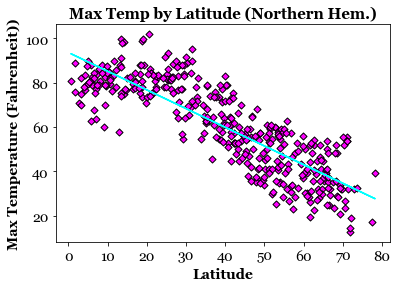

In [114]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Max Temp by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Max Temperature (Fahrenheit))', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression coefficient is 0.74.
The p-value for this relationship is 0.0.


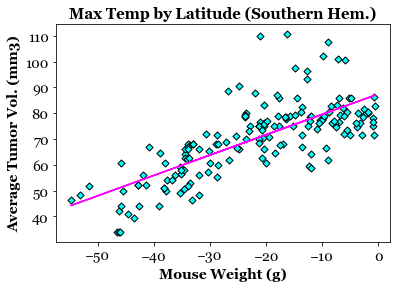

In [115]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Max Temp by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Mouse Weight (g)', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Average Tumor Vol. (mm3)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression coefficient is 0.29.
The p-value for this relationship is 0.0.


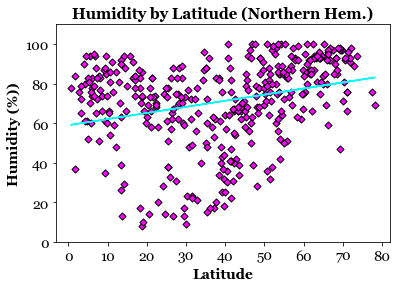

In [116]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Humidiy (%))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Humidity by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%))', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(0, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression coefficient is -0.08.
The p-value for this relationship is 0.31.


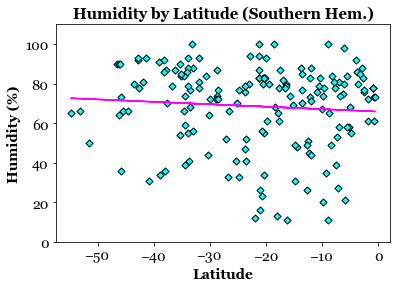

In [117]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Humidity by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Humidity (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(0, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression coefficient is 0.22.
The p-value for this relationship is 0.0.


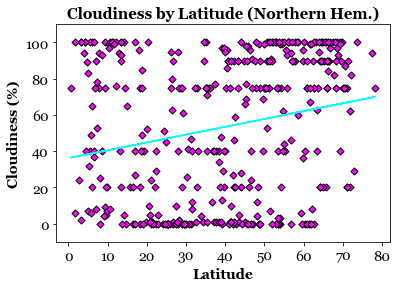

In [118]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Cloudiness by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-10, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression coefficient is 0.16.
The p-value for this relationship is 0.04.


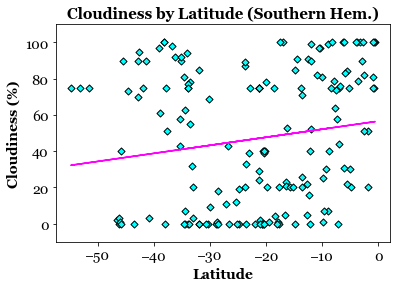

In [119]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Cloudiness by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Cloudiness (%)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-10, 110)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression coefficient is 0.03.
The p-value for this relationship is 0.59.


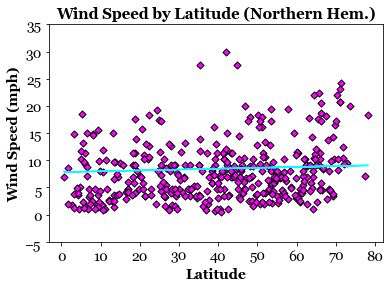

In [120]:
# Set x and y values
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='fuchsia', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"cyan")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Wind Speed by Latitude (Northern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-5, 35)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression coefficient is -0.07.
The p-value for this relationship is 0.33.


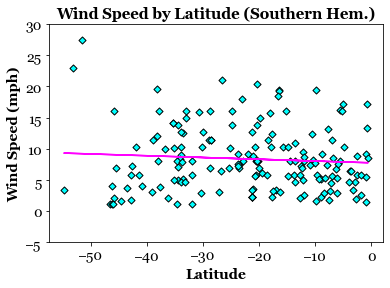

In [121]:
# Set x and y values
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
                                                               
# Linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='D', color='cyan', s=25, edgecolor='black')
plt.plot(x_values,regress_values,"fuchsia")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Wind Speed by Latitude (Southern Hem.)", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Latitude', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Wind Speed (mph)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)
plt.yticks(fontsize=14, **csfont)
plt.ylim(-5, 30)
plt.show

# Regression coefficient & p-value
print(f"The regression coefficient is {round(rvalue,2)}.")
print(f"The p-value for this relationship is {round(pvalue,2)}.")